Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


# 1. 50_startups

In [22]:
import pandas as pd
import numpy as np

In [23]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (1).csv


In [24]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [27]:
data.corr()

<ipython-input-27-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [28]:
data=pd.get_dummies(data,columns=['State'])
data


,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [29]:
data.rename(columns={'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend','State_New York':'State_NewYork'},inplace=True)
data

,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


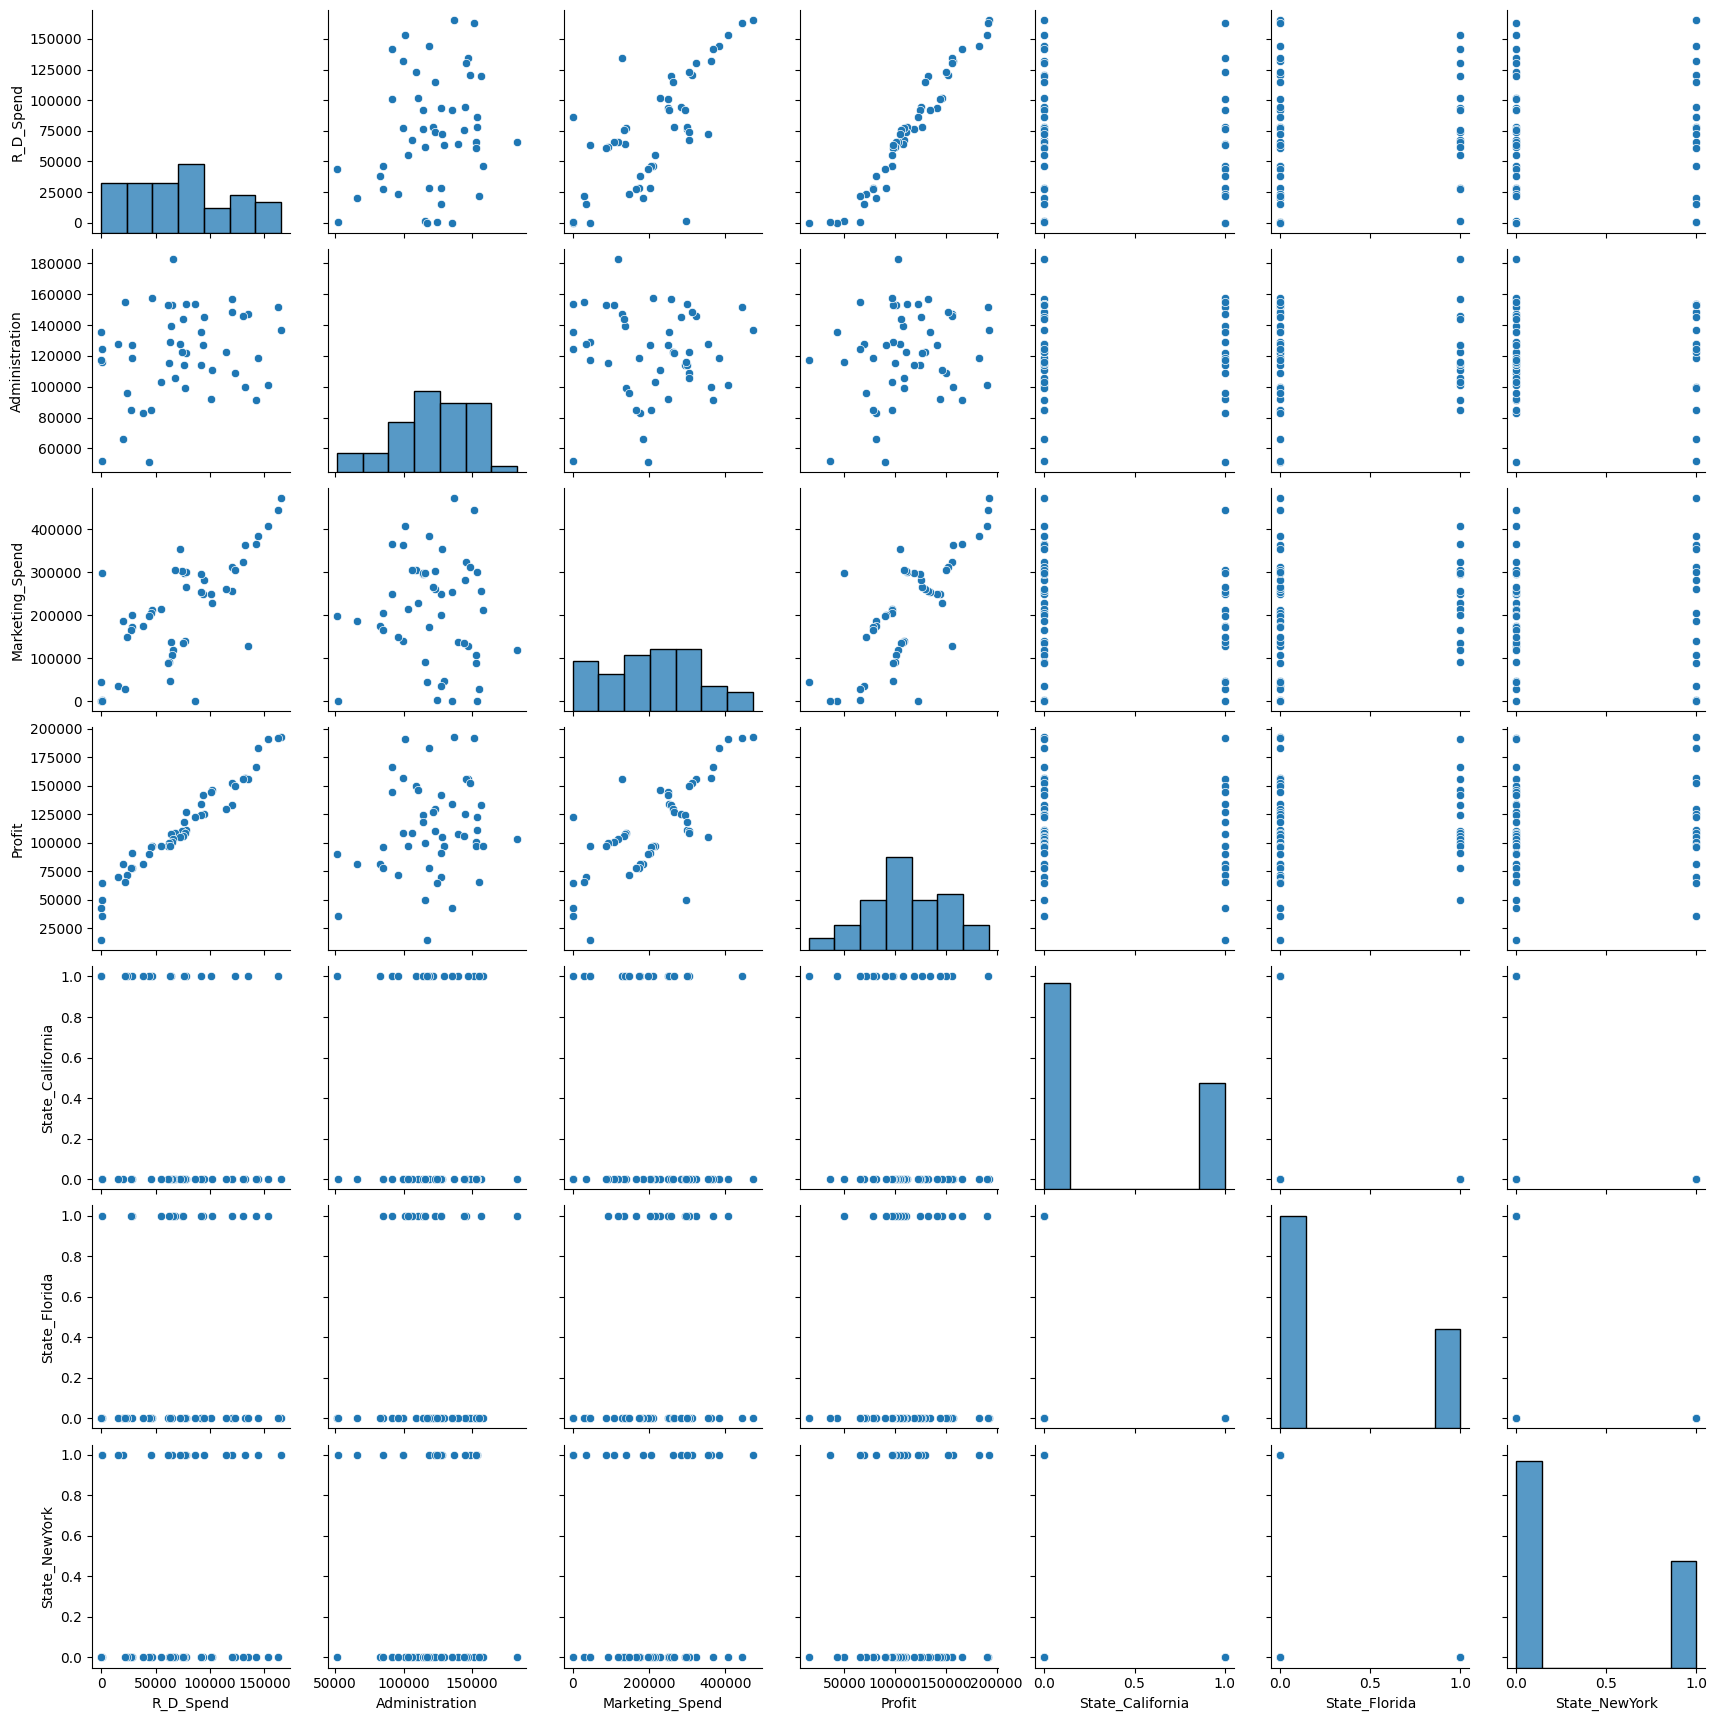

In [30]:
import seaborn as sns
sns.pairplot(data)

In [31]:
import statsmodels.api as sm
X = data[['R_D_Spend',]]  # Specify your independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = data['Profit']  # Specify your dependent variable

model = sm.OLS(y, X).fit()  # Fit the linear regression model

In [32]:
infl = model.get_influence()
c,p_value=infl.cooks_distance

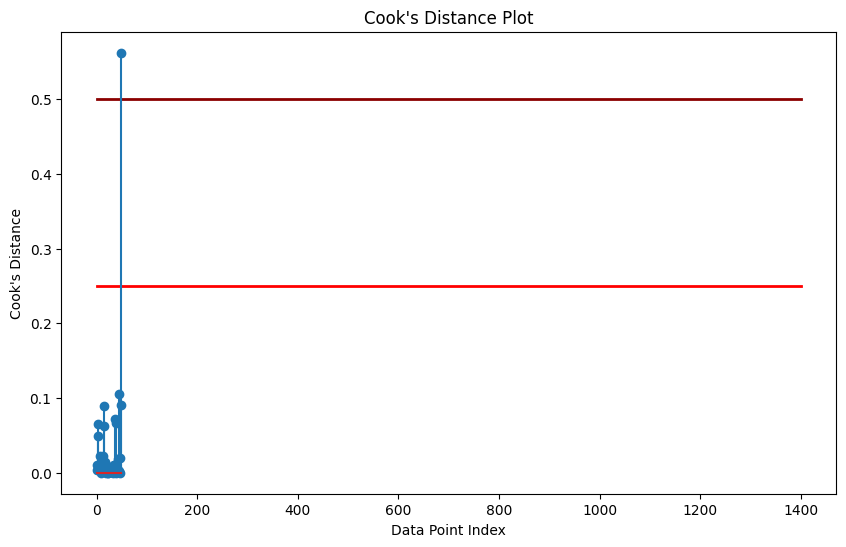

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
x=[0,1400]
y=[.5,.5]
plt.plot(x,y,color='darkred',linewidth=2)
y1=[0.25,0.25]
plt.plot(x,y1,color='red',linewidth=2)
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Data Point Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [34]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=data).fit()

In [35]:
model.params

Intercept           37633.233317
R_D_Spend               0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [36]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [37]:
model.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782789
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825742
19     7182.671589
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715292
46    -6782.242679
47    -3908.502003
48   -13449.663082
49   -33503.638790
dtype: float64

In [38]:
data['predicted']=model.fittedvalues
data

,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,predicted
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192390.571365
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189071.320106
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182276.186735
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173584.976191
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172277.133819
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163473.807120
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158099.292789
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160155.644651
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151634.743327
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154829.662529


In [39]:
data['error']=model.resid
data

,R_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,predicted,error
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192390.571365,-128.741365
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172277.133819,-6089.193819
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158099.292789,-1976.782789
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151634.743327,577.026673
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154829.662529,-5069.702529


In [40]:
model.rsquared


0.9507524843355148

In [41]:
model.pvalues

Intercept           2.807645e-09
R_D_Spend           2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64

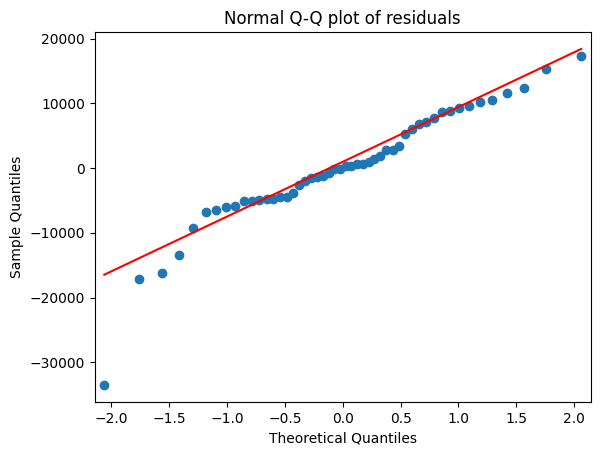

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()



<Axes: >

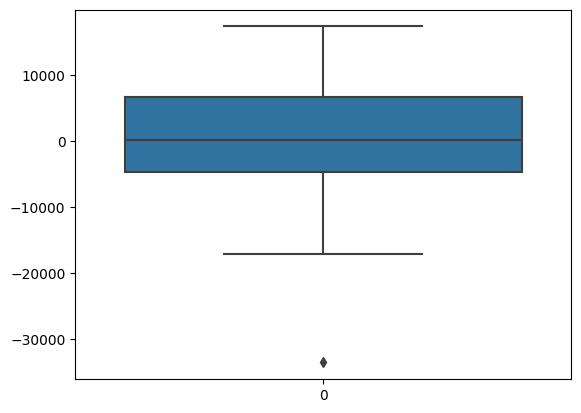

In [43]:
sns.boxplot(model.resid)
